In [1]:
# rappel de l'énigme et du but : 
# => quatre personnes
# => deux couleurs de cheveux différentes => orange et bleu
# => objectif => mettre en place une stratégie avec les autres joueurs/personnages permettant de déterminer la
# couleur de l'ensemble des chevelures avec la plus grande probabilité possible

In [2]:
# stratégie possible => concept de parité => caractère pair ou impair d'un nombre

In [3]:
# traduction possible de la stratégie appliquée :
# avant de se faire teindre les cheveux, les quatres joueurs/personnages se sont consultés et ont déterminé le code
# suivant/la règle suivante, pour chaque joueur :
# => si le nombre de chevelures indigo que le joueur voit est pair, alors sa réponse sera "orange"
# => si le nombre de chevelures indigo que le joueur voit est impair, alors sa réponse sera "indigo"

In [4]:
# NB : en procédant selon la règle précédente, cela permet d'indiquer aux autres joueurs, la parité des chevelures
# indigo
# même si l'on se trompe dans un cas sur deux sur la couleur de notre propre chevelure, on donne aux autres joueurs
# la parité du nombre de chevelures indigo devant nous

In [5]:
# chaque personne/joueur suivant aura la possibilité de déduire la couleur de sa propre chevelure en fonction des
# réponses des personnes précédentes ainsi que du nombre pair ou impair de chevelures indigo qu'il/elle voit

In [6]:
# nombre de joueurs présents :

# 4 personnes/joueurs => soi-même(dernier joueur dans la file),  Bob(troisième joueur dans la file), 
# Charlie(deuxième joueur dans la file), Dahlia(première joueuse dans la file)

# assignement des couleurs :
# => nombre pair de chevelures => orange
# => nombre impair de chevelures => indigo

In [7]:
# déroulement de la stratégie dans le détail :
# on prends la répartition suivante de teintures => "orange", "orange", "indigo", "orange" avec le sens => joueur 
# 4 à joueur 1
# situation des joueurs :

# => dernier joueur de la file(sois-même) => on voit une chevelure indigo devant nous => comme "1" est un chiffre 
# impair et que nous ne connaissons pas les réponses des autres joueurs en vue de déterminer avec certitude 
# la couleur de notre propre chevelure, notre réponse concernera la parité de couleurs de chevelures et sera 
# "indigo"

# => troisième joueur de la file(Bob) => Bob voit une chevelure indigo devant lui => comme "1" est un chiffre
# impair, la parité relevée sera "indigo"

# comme le troisième joueur de la file(Bob) connait notre réponse(chiffre impair "1" => indigo) et sait qu'on se  
# trouve derrière lui, il en déduit que sa propre chevelure correspond à un chiffre pair et que sa couleur est  
# donc "orange"

# => second joueur de la file(Charlie) => Charlie ne voit pas de chevelure indigo devant lui => comme "0" est un
# chiffre pair, la parité relevée sera "orange"

# comme le second joueur de la file(Charlie) connait notre réponse(chiffre impair "1" => indigo) concernant la 
# parité d'origine et qu'il connait également la réponse de Bob(chiffre pair "0" => orange), il en déduit que sa 
# propre chevelure correspond à un chiffre impair et que sa couleur est donc "indigo"

# => premier joueur de la file(Dahlia) => Dahlia ne voit pas de chevelure indigo devant lui => comme "0" est un
# chiffre pair, la parité relevée sera "orange"

# le premier joueur de la file(Dahlia) se sert des réponses des trois premiers joueurs(nous, Bob et Charlie) afin
# de déduire la couleur de sa chevelure => orange

In [8]:
# représentation de l'énigme sur un simulateur d'ordinateur quantique

In [9]:
# => portes quantiques utilisées :
# on utilisera deux portes quantiques pour cette énigme => porte CNOT/Contrôle-Not et porte Hadamard
# la porte CNOT/Contrôle-Not utilise deux Qubits => un Qubit de contrôle et un Qubit cible
# la porte Hadamard permet de placer un Qubit en superposition des états "0" et "1"
# cette porte permet de créer des probabilités de 50% pour l'obtention d'un état ou de l'autre et d'explorer tous
# les cas de figure de l'énigme en parallèle

In [10]:
# Step 1 => importation des modules de base

In [11]:
import numpy as np

In [12]:
from qiskit import *
from qiskit.visualization import *

In [13]:
# Step 2 => création du circuit quantique avec huit Qubits : 
# => les Qubits de "q0" à "q3" représentent les quatre joueurs => Alice, Bob, Charlie et Dahlia
# => les Qubits de "q4" à "q7" représentent les raisonnements quatre joueurs 

In [14]:
circ = QuantumCircuit(8)

In [15]:
# on affiche le circuit à ce stade

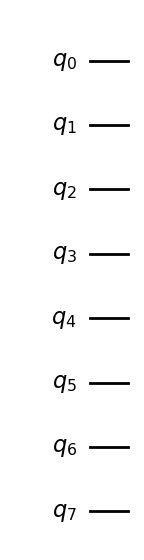

In [16]:
circ.draw("mpl")

In [17]:
# Step 2 => création de portes Hadamard sur les Qubits représentant les quatre joueurs ("q0" à "q3") :
# l'objectif est de faire cohabiter toutes les combinaisons possibles de teintures indigo et oranges dans l'état
# quantique

In [18]:
# rappels :
# l'état "0" d'un Qubit correspond à "pair" (pour la parité) ou "orange" pour la couleur
# l'état "1" d'un Qubit correspond à "impair" (pour la parité) ou "indigo" pour la couleur

# étant donné l'absence de joueurs précédents et donc de réponses précédentes, le joueur 1 (Alice) ne peut déduire 
# avec certitude la couleur de sa chevelure (marge d'erreur 50%) et peux seulement déterminer la parité (pair ou
# impair) de chevelure indigo se trouvant devant elle

# les joueurs 2 (Bob), 3 (Charlie) et 4 (Dahlia) peuvent déduire la couleur de leurs chevelures en se basant sur  
# les réponses des joueurs précédents

In [19]:
# on crée les quatres portes Hadamard sur chacun des Qubits des joueurs => "q0", "q1", "q2" et "q3"

In [20]:
circ.h(0)
circ.h(1)
circ.h(2)
circ.h(3)

In [21]:
# on affiche le circuit à ce stade

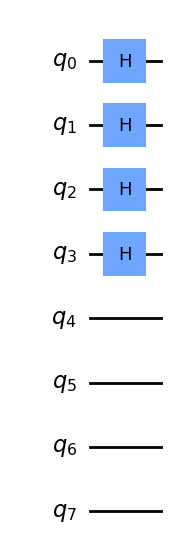

In [22]:
circ.draw("mpl")

In [23]:
# Situation et états d'origine des Qubits :

# A ce stade, en prenant la possibilité posée par l'énigme, illustrée dans la vidéo, les Qubits disposent des états 
# suivants :

# => Qubits "joueurs" :
# => Joueur 1 (Alice) => Qubit "q0" à l'état "0", la couleur de la chevelure d'Alice étant orange, parité "pair"
# => Joueur 2 (Bob) => Qubit "q1" à l'état "0", la couleur de la chevelure de Bob étant orange, parité "pair"
# => Joueur 3 (Charlie) => Qubit "q2" à l'état "1", la couleur de la chevelure de Charlie étant indigo, 
# parité "impair"
# => Joueur 4 (Dahlia) => Qubit "q3" à l'état "0", la couleur de la chevelure de Dahlia étant orange, parité "pair"

# NB : les états des Qubits "joueurs" resteront inchangés tout au long du calcul quantique, les couleurs des 
# chevelures n'évoluant pas au cours du temps

# => Qubits "raisonnements" :
# => Joueur 1 (Alice) => Qubit "q4" à son état d'origine "0"
# => Joueur 2 (Bob) => Qubit "q5" à son état d'origine "0"
# => Joueur 3 (Charlie) => Qubit "q6" à son état d'origine "0"
# => Joueur 4 (Dahlia) => Qubit "q7" à son état d'origine "0"

In [24]:
# on ajoute une barrière relative avant de passer à l'étape suivante

In [25]:
circ.barrier([0, 1, 2, 3, 4, 5, 6, 7])

In [26]:
# Step 3 => le joueur 1 (Alice), détermine la parité d'origine ("pair/0" ou "impair/1") de chevelures indigo

# Rappel : le Qubit dédié au raisonnement du joueur 1 (Alice) est le Qubit "q4"

In [27]:
# on va répercuter les états des Qubits des trois joueurs suivants (Qubit "q1" pour Bob, Qubit "q2" pour Charlie et
# Qubit "q3" pour Dahlia) sur le Qubit "q4" correspondant au raisonnement du joueur 1 (Alice) afin qu'elle puisse
# déterminer, en ayant connaissance de la couleur des chevelures des trois autres joueurs qui sont devant elle (Bob
# , Charlie et Dahlia), quelle est la parité d'origine ("pair/0" ou "impair/1") de chevelures indigo

In [28]:
# Pour ce faire, on applique successivement trois portes CNOT/Contrôle-Not dans cet ordre :
# => une porte CNOT/Contrôle-Not du Qubit "q1" (Bob) au Qubit "q4" (raisonnement d'Alice)
# => une porte CNOT/Contrôle-Not du Qubit "q2" (Charlie) au Qubit "q4" (raisonnement d'Alice)
# => une porte CNOT/Contrôle-Not du Qubit "q3" (Dahlia) au Qubit "q4" (raisonnement d'Alice)

# NB : comme seul le Qubit "q2" du joueur 3 (Charlie) est à l'état "1", seule la porte CNOT/Contrôle-Not 
# correspondante sera finalement appliquée au Qubit "q4" du raisonnement du joueur 1 ("Alice")

In [29]:
circ.cx(1, 4)
circ.cx(2, 4)
circ.cx(3, 4)

In [30]:
# on affiche le circuit à ce stade

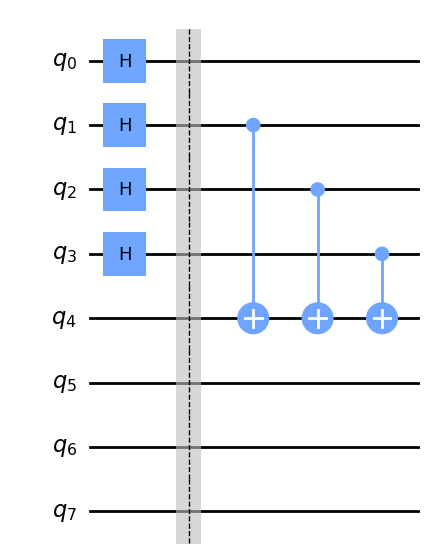

In [31]:
circ.draw("mpl")

In [32]:
# A ce stade, les Qubits disposent des états suivants :

# => Qubits "raisonnements" :
# => Joueur 1 (Alice) => Qubit "q4" à l'état "1", la parité d'origine ("pair/0" ou "impair/1") de chevelures indigo
# étant de "1" (Alice voit une chevelure couleur indigo devant elle)
# => Joueur 2 (Bob) => Qubit "q5" à son état d'origine "0"
# => Joueur 3 (Charlie) => Qubit "q6" à son état d'origine "0"
# => Joueur 4 (Dahlia) => Qubit "q7" à son état d'origine "0"

In [33]:
# on ajoute une barrière relative avant de passer à l'étape suivante

In [34]:
circ.barrier([0, 1, 2, 3, 4, 5, 6, 7])

In [35]:
# Step 4 => les joueurs 2 (Bob), 3 (Charlie) et 4 (Dahlia) prennent en note la réponse du joueur 1 (Alice) 
# concernant la parité d'origine ("pair/0" ou "impair/1") de chevelures indigo

# rappel : les Qubits dédiés aux raisonnements des joueurs 2 (Bob), 3 (Charlie) et 4 (Dahlia) sont les Qubits "q5",
# "q6" et "q7"

In [36]:
# on va répercuter l'état du Qubit dédié au raisonnement du joueur 1 (Alice) sur les Qubits "q5", "q6" et "q7", 
# correspondants aux raisonnements des trois joueurs suivants (Qubit "q5" pour Bob, Qubit "q6" pour Charlie et
# Qubit "q7" pour Dahlia) afin que ces trois joueurs puissent avoir connaissance de la réponse du joueur 1 (Alice)
# concernant la parité d'origine ("pair/0" ou "impair/1") de chevelures indigo

In [37]:
# Pour ce faire, on applique successivement trois portes CNOT/Contrôle-Not dans cet ordre :
# => une porte CNOT/Contrôle-Not du Qubit "q4" (raisonnement d'Alice) au Qubit "q5" (raisonnement de Bob)
# => une porte CNOT/Contrôle-Not du Qubit "q4" (raisonnement d'Alice) au Qubit "q6" (raisonnement de Charlie)
# => une porte CNOT/Contrôle-Not du Qubit "q4" (raisonnement d'Alice) au Qubit "q7" (raisonnement de Dahlia)

In [38]:
circ.cx(4, 5)
circ.cx(4, 6)
circ.cx(4, 7)

In [39]:
# on affiche le circuit à ce stade

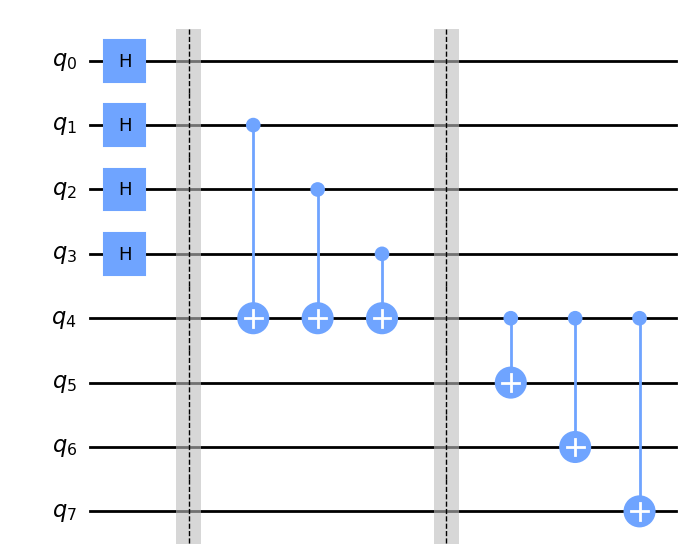

In [40]:
circ.draw("mpl")

In [41]:
# A ce stade, les Qubits disposent des états suivants :

# => Qubits "raisonnements" :
# => Joueur 1 (Alice) => Qubit "q4" à l'état "1", la parité d'origine ("pair/0" ou "impair/1") de chevelures indigo
# étant de "1" (Alice voit une chevelure couleur indigo devant elle)
# => Joueur 2 (Bob) => Qubit "q5" à l'état "1", l'information/l'état concernant la parité d'origine de chevelures 
# indigo ayant été répercuté qur le Qubit "q5" par le biais d'une porte CNOT/Contrôle-Not
# => Joueur 3 (Charlie) => Qubit "q6" à l'état "1", l'information/l'état concernant la parité d'origine de 
# chevelures indigo ayant été répercuté qur le Qubit "q6" par le biais d'une porte CNOT/Contrôle-Not
# => Joueur 4 (Dahlia) => Qubit "q7" à l'état "1", l'information/l'état concernant la parité d'origine de 
# chevelures indigo ayant été répercuté sur le Qubit "q7" par le biais d'une porte CNOT/Contrôle-Not

In [42]:
# on ajoute une barrière relative avant de passer à l'étape suivante

In [43]:
circ.barrier([0, 1, 2, 3, 4, 5, 6, 7])

In [44]:
# Step 4 => le joueur 2 (Bob) prends en note la couleur des chevelures des joueurs 3 (Charlie) et 4 (Dahlia) qui 
# sont devant lui, et utilise ces informations afin de déterminer la couleur de sa propre chevelure

In [45]:
# on va modifier l'état du Qubit "q5" dédié au raisonnement du joueur 2 (Bob) en fonction des états des Qubits "q2"
# et "q3" des joueurs 3 (Charlie) et 4 (Dahlia) à l'aide de portes CNOT/Contrôle-Not, et ce, afin de permettre au
# joueur 2 (Bob) de déduire la couleur de sa propre chevelure

In [46]:
# Pour ce faire, on applique successivement deux portes CNOT/Contrôle-Not dans cet ordre :
# => une porte CNOT/Contrôle-Not du Qubit "q2" (Charlie) au Qubit "q5" (raisonnement de Bob)
# => une porte CNOT/Contrôle-Not du Qubit "q3" (Dahlia) au Qubit "q5" (raisonnement de Bob)

In [47]:
circ.cx(2, 5)
circ.cx(3, 5)

In [48]:
# on affiche le circuit à ce stade

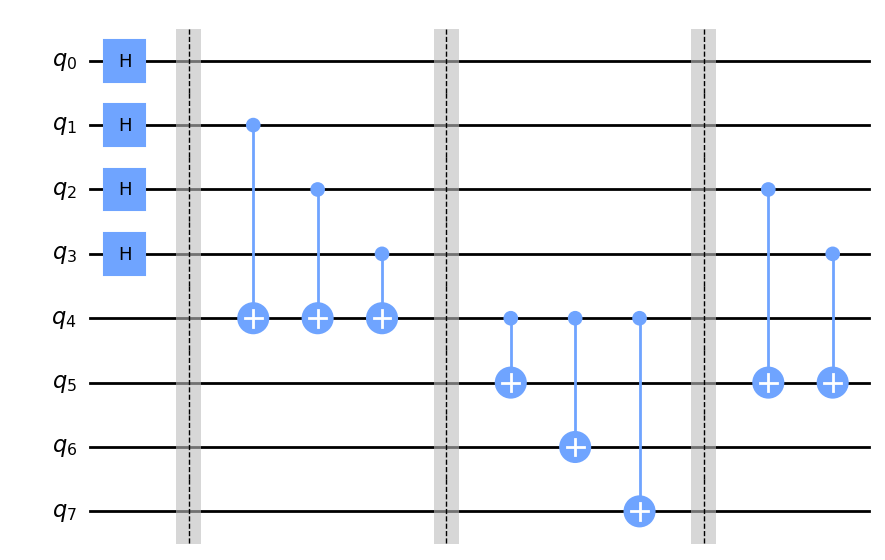

In [49]:
circ.draw("mpl")

In [50]:
# A ce stade, les Qubits disposent des états suivants :

# => Qubits "raisonnements" :
# => Joueur 1 (Alice) => Qubit "q4" à l'état "1", état inchangé par rapport au stade précédent
# => Joueur 2 (Bob) => Qubit "q5" à l'état "0", l'information/l'état concernant la couleur de la chevelure de Bob 
# ayant été déduit par l'application d'une porte CNOT/Contrôle-Not du Qubit "q2" (Bob) au Qubit "q5" (raisonnement 
# de Bob)
# => Joueur 3 (Charlie) => Qubit "q6" à l'état "1", état inchangé par rapport au stade précédent
# => Joueur 4 (Dahlia) => Qubit "q7" à l'état "1", état inchangé par rapport au stade précédent

In [51]:
# on ajoute une barrière relative avant de passer à l'étape suivante

In [52]:
circ.barrier([0, 1, 2, 3, 4, 5, 6, 7])

In [53]:
# Step 5 => les joueurs 3 (Charlie) et 4 (Dahlia) prennent en note la couleur de la chevelure du joueur 2 (Bob) 
# déterminée par le joueur 2 lui-même à l'étape 4

In [54]:
# On applique successivement deux portes CNOT/Contrôle-Not dans cet ordre :
# => une porte CNOT/Contrôle-Not du Qubit "q5" (raisonnement de Bob) au Qubit "q6" (raisonnement de Charlie)
# => une porte CNOT/Contrôle-Not du Qubit "q5" (raisonnement de Bob) au Qubit "q7" (raisonnement de Dahlia)

In [55]:
# Rappel/NB : application des portes CNOT/Contrôle-Not :
# comme le Qubit de contrôle "q5" (raisonnement de Bob) est à l'état "0", les états des deux Qubits cibles "q6" et 
# "q7" (raisonnements de Charlie et de Dahlia) restent inchangés (états "1" pour les deux Qubits "q6" et "q7")

In [56]:
circ.cx(5, 6)
circ.cx(5, 7)

In [57]:
# on affiche le circuit à ce stade

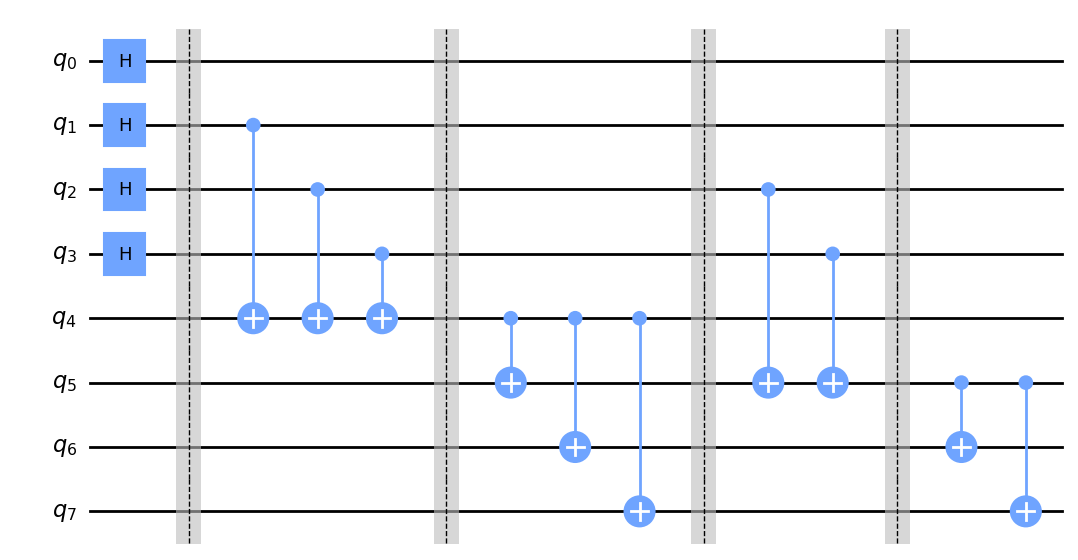

In [58]:
circ.draw("mpl")

In [59]:
# A ce stade, les Qubits disposent des états suivants :

# => Qubits "raisonnements" :
# => Joueur 1 (Alice) => Qubit "q4" à l'état "1", état inchangé par rapport au stade précédent
# => Joueur 2 (Bob) => Qubit "q5" à l'état "0", état inchangé par rapport au stade précédent
# => Joueur 3 (Charlie) => Qubit "q6" à l'état "1", état inchangé par rapport au stade précédent
# => Joueur 4 (Dahlia) => Qubit "q7" à l'état "1", état inchangé par rapport au stade précédent

In [60]:
# on ajoute une barrière relative avant de passer à l'étape suivante

In [61]:
circ.barrier([0, 1, 2, 3, 4, 5, 6, 7])

In [62]:
# Step 6 => le joueur 3 (Charlie) prends en note la couleur de la chevelure du joueur 4 (Dahlia) qui se trouve
# devant lui et utilise cette information afin de déterminer la couleur de sa propre chevelure

In [63]:
# On applique une porte CNOT/Contrôle-Not :
# => une porte CNOT/Contrôle-Not du Qubit "q3" (Dahlia) au Qubit "q6" (raisonnement de Charlie)

In [64]:
# Rappel/NB : application de la porte CNOT/Contrôle-Not :
# comme le Qubit de contrôle "q3" (Dahlia) est à l'état "0" (la couleur de la chevelure de Dahlia étant orange
# /parité "pair"), l'état du Qubit cible "q6" (raisonnement de Charlie) reste inchangé (état "1" pour le Qubit 
# "q6")

In [65]:
circ.cx(3, 6)

In [66]:
# on affiche le circuit à ce stade

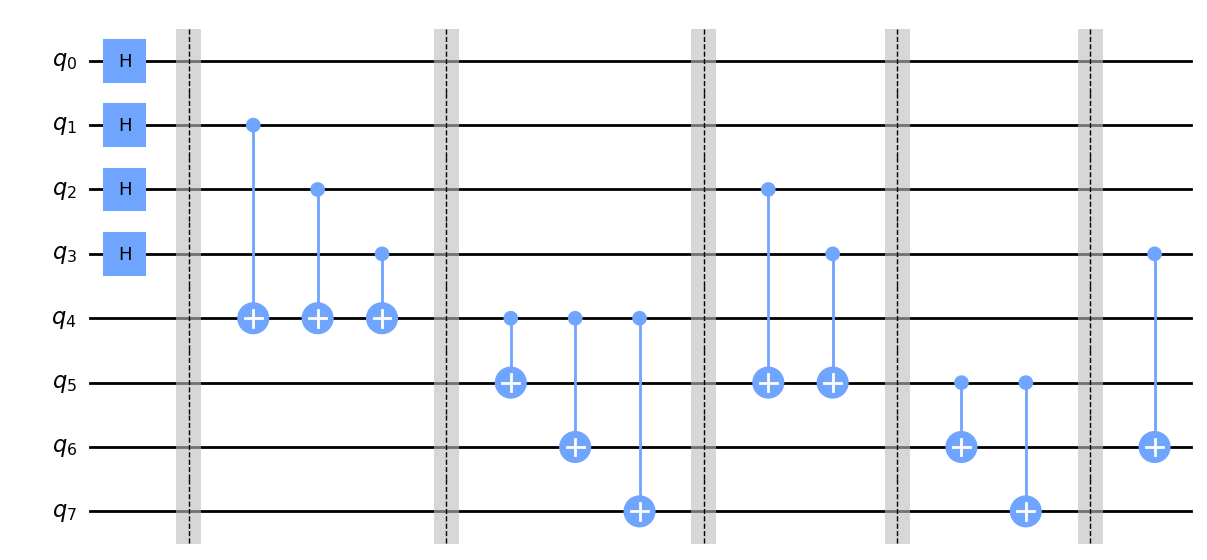

In [67]:
circ.draw("mpl")

In [68]:
# A ce stade, les Qubits disposent des états suivants :

# => Qubits "raisonnements" :
# => Joueur 1 (Alice) => Qubit "q4" à l'état "1", état inchangé par rapport au stade précédent
# => Joueur 2 (Bob) => Qubit "q5" à l'état "0", état inchangé par rapport au stade précédent
# => Joueur 3 (Charlie) => Qubit "q6" à l'état "1", état inchangé par rapport au stade précédent
# => Joueur 4 (Dahlia) => Qubit "q7" à l'état "1", état inchangé par rapport au stade précédent

In [69]:
# on ajoute une barrière relative avant de passer à l'étape suivante

In [70]:
circ.barrier([0, 1, 2, 3, 4, 5, 6, 7])

In [71]:
# Step 7 => le joueur 4 (Dahlia) prends en note la couleur de la chevelure du joueur 3 (Charlie) et utilise cette 
# information afin de déterminer la couleur de sa propre chevelure

In [72]:
# on va modifier l'état du Qubit "q7" dédié au raisonnement du joueur 4 (Dahlia) en fonction de l'état du Qubit 
# "q6" dédié au raisonnement du joueur 3 (Charlie) à l'aide d'une porte CNOT/Contrôle-Not, et ce, afin de permettre
# au joueur 4 (Dahlia) de déduire la couleur de sa propre chevelure

In [73]:
# On applique une porte CNOT/Contrôle-Not :
# => une porte CNOT/Contrôle-Not du Qubit "q6" (raisonnement de Charlie) au Qubit "q7" (raisonnement de Dahlia)

In [74]:
circ.cx(6, 7)

In [75]:
# on affiche le circuit à ce stade

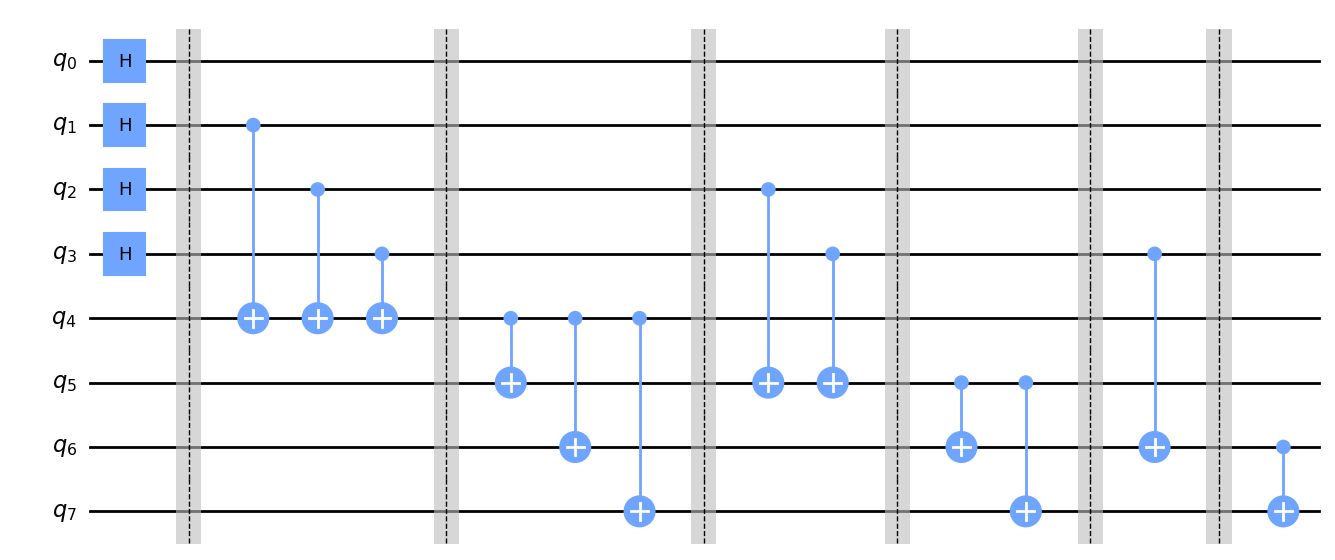

In [76]:
circ.draw("mpl")

In [77]:
# A ce stade, les Qubits disposent des états suivants :

# => Qubits "raisonnements" :
# => Joueur 1 (Alice) => Qubit "q4" à l'état "1", état inchangé par rapport au stade précédent
# => Joueur 2 (Bob) => Qubit "q5" à l'état "0", état inchangé par rapport au stade précédent
# => Joueur 3 (Charlie) => Qubit "q6" à l'état "1", état inchangé par rapport au stade précédent
# => Joueur 4 (Dahlia) => Qubit "q7" à l'état "0", l'information/l'état concernant la couleur de la chevelure de 
# Dahlia ayant été déduit par l'application d'une porte CNOT/Contrôle-Not du Qubit "q6" (raisonnement de Charlie) 
# au Qubit "q7" (raisonnement de Dahlia)

In [78]:
# Step 8 => test du circuit quantique et affichage des seize possibilités du système selon les propositions
# suivantes : 

# => 1 : "toutes les chevelures sont orange, les parités constatées sont paires et les couleurs des chevelures
# obtenues par déduction sont oranges elles aussi" => "00000000"

# => 2 : "toutes les chevelures sont orange sauf celle du joueur 1 (Alice), les parités constatées sont paires et 
# les couleurs des chevelures obtenues par déduction sont oranges elles aussi" => "10000000"

# => 3 : "toutes les chevelures sont orange sauf celle du joueur 2 (Bob), le joueur 1 (Alice) voit une chevelure 
# couleur indigo devant elle (parité impair constatée), le joueur 2 (Bob) déduit que la couleur de sa chevelure est
# indigo, les joueurs 3 (Charlie) et 4 (Dahlia) déduisent que leurs chevelures sont de couleur orange" 
# => "01001100"

# => 4 : "les chevelures des joueurs 1 (Alice) et 2 (Bob) sont indigo, les chevelures des joueurs 3 (Charlie) et 4 
# (Dahlia) sont orange
# le joueur 1 (Alice) voit une chevelure couleur indigo devant elle (parité impair constatée), le joueur 2 (Bob) 
# déduit que la couleur de sa chevelure est indigo, les joueurs 3 (Charlie) et 4 (Dahlia) déduisent que leurs 
# chevelures sont de couleur orange" => "11001100"

# => 5 : "les chevelures des joueurs 1 (Alice), 2 (Bob) et 4 (Dahlia) sont orange, la chevelure du joueur 3 
# (Charlie) est indigo
# le joueur 1 (Alice) voit une chevelure couleur indigo devant elle (parité impair constatée), le joueur 2 (Bob) 
# déduit que la couleur de sa chevelure est orange, le joueur 3 (Charlie) déduit que la couleur de sa chevelure est
# indigo et le joueur 4 (Dahlia) déduit que la couleur de sa chevelure est orange => "00101010"

# => 6 : "les chevelures des joueurs 1 (Alice) et 3 (Charlie) sont indigo, les chevelures des joueurs 2 (Bob) et 4 
# (Dahlia) sont orange
# le joueur 1 (Alice) voit une chevelure couleur indigo devant elle (parité impair constatée), le joueur 2 (Bob) 
# déduit que la couleur de sa chevelure est orange, le joueur 3 (Charlie) déduit que la couleur de sa chevelure est
# indigo et le joueur 4 (Dahlia) déduit que la couleur de sa chevelure est orange => "10101010"

# => 7 : "les chevelures des joueurs 1 (Alice) et 3 (Charlie) sont orange, les chevelures des joueurs 2 (Bob) et 4 
# (Dahlia) sont indigo
# le joueur 1 (Alice) voit deux chevelures couleur indigo devant elle (parité pair constatée), le joueur 2 (Bob) 
# déduit que la couleur de sa chevelure est indigo, le joueur 3 (Charlie) déduit que la couleur de sa chevelure est
# orange et le joueur 4 (Dahlia) déduit, à tort, que la couleur de sa chevelure est orange => "01010100"

# => 8 : "les chevelures des joueurs 1 (Alice) et 4 (Dahlia) sont orange, les chevelures des joueurs 2 (Bob) et 3 
# (Charlie) sont indigo
# le joueur 1 (Alice) voit une chevelure couleur indigo devant elle (parité impair constatée), le joueur 2 (Bob) 
# déduit que la couleur de sa chevelure est indigo, le joueur 3 (Charlie) déduit, à tort, que la couleur de sa 
# chevelure est orange et le joueur 4 (Dahlia) déduit que la couleur de sa chevelure est orange => "01101100"

# => 9 : "les chevelures des joueurs 1 (Alice), 2 (Bob) et 3 (Charlie) sont orange, la chevelure du joueur 4 
# (Dahlia) est indigo 
# le joueur 1 (Alice) voit une chevelure couleur indigo devant elle (parité impair constatée), le joueur 2 (Bob) 
# déduit que la couleur de sa chevelure est orange, le joueur 3 (Charlie) déduit que la couleur de sa chevelure est
# orange et le joueur 4 (Dahlia) déduit que la couleur de sa chevelure est indigo => "00011001"

# => 10 : "les chevelures des joueurs 1 (Alice) et 4 (Dahlia) sont indigo, les chevelures des joueurs 2 (Bob) et 
# 3 (Charlie) sont orange
# le joueur 1 (Alice) voit une chevelure couleur indigo devant elle (parité impair constatée), les joueurs 2 (Bob) 
# et 3 (Charlie) déduisent que la couleur de leurs chevelures est orange et le joueur 4 (Dahlia) déduit que la 
# couleur de sa chevelure est indigo => "10011001"

# => 11 : "les chevelures des joueurs 1 (Alice) et 3 (Charlie) sont orange, les chevelures des joueurs 2 (Bob) et 
# 4 (Dahlia) sont indigo
# le joueur 1 (Alice) voit deux chevelures couleur indigo devant elle (parité pair constatée), les joueurs 2 (Bob) 
# et 4 (Dahlia) déduisent que la couleur de leurs chevelures est indigo et le joueur 3 (Charlie) déduit que la 
# couleur de sa chevelure est orange => "01010101"

# => 12 : "les chevelures des joueurs 1 (Alice), 2 (Bob) et 4 (Dahlia) sont indigo, la chevelure du joueur 3 
# (Charlie) est orange
# le joueur 1 (Alice) voit deux chevelures couleur indigo devant elle (parité pair constatée), les joueurs 2 (Bob) 
# et 4 (Dahlia) déduisent que la couleur de leurs chevelures est indigo et le joueur 3 (Charlie) déduit que la 
# couleur de sa chevelure est orange => "11010101"

# => 13 : "les chevelures des joueurs 1 (Alice) et 2 (Bob) sont orange, les chevelures des joueurs 3 (Charlie) et 
# 4 (Dahlia) sont indigo
# le joueur 1 (Alice) voit deux chevelures couleur indigo devant elle (parité pair constatée), les joueurs 3 
# (Charlie) et 4 (Dahlia) déduisent que la couleur de leurs chevelures est indigo et le joueur 2 (Bob) déduit que 
# la couleur de sa chevelure est orange => "00110011"

# => 14 : "les chevelures des joueurs 1 (Alice), 3 (Charlie) et 4 (Dahlia) sont indigo, la chevelure du joueur 2 
# (Bob) est orange
# le joueur 1 (Alice) voit deux chevelures couleur indigo devant elle (parité pair constatée), les joueurs 3 
# (Charlie) et 4 (Dahlia) déduisent que la couleur de leurs chevelures est indigo et le joueur 2 (Bob) déduit que 
# la couleur de sa chevelure est orange => "10110011"

# => 15 : "les chevelures des joueurs 2 (Bob), 3 (Charlie) et 4 (Dahlia) sont indigo, la chevelure du joueur 1 
# (Alice) est orange
# le joueur 1 (Alice) voit trois chevelures couleur indigo devant elle (parité impair constatée), les joueurs 2 
# (Bob), 3 (Charlie) et 4 (Dahlia) déduisent que la couleur de leurs chevelures est indigo => "01111111"

# => 16 : "les chevelures de tous les joueurs sont indigo
# le joueur 1 (Alice) voit trois chevelures couleur indigo devant elle (parité impair constatée), les joueurs 2 
# (Bob), 3 (Charlie) et 4 (Dahlia) déduisent que la couleur de leurs chevelures est indigo => "11111111"

In [79]:
# utilisation d'un simulateur quantique

In [80]:
# création du moteur de calcul avec utilisation d'un simulateur de vecteurs d'états

In [81]:
backend = Aer.get_backend('statevector_simulator') 

In [82]:
# lancement du calcul quantique

In [83]:
job = backend.run(circ)

In [84]:
# stockage des résultats du calcul quantique

In [85]:
result = job.result()

In [86]:
# présentation des résultats

In [87]:
# affichage des résultats sous forme standard de vecteurs d'états

In [88]:
outputstate = result.get_statevector(circ, decimals = 8)

In [89]:
print(outputstate)

Statevector([0.25+0.j, 0.25+0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
             0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
             0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
             0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
             0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
             0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
             0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
             0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
             0.  +0.j, 0.  +0.j, 0.25+0.j, 0.25+0.j, 0.  +0.j, 0.  +0.j,
             0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
             0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
             0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
             0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
             0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j

In [90]:
 # affichage des résultats sous forme de qsphère décrivant les différentes possibilités du système

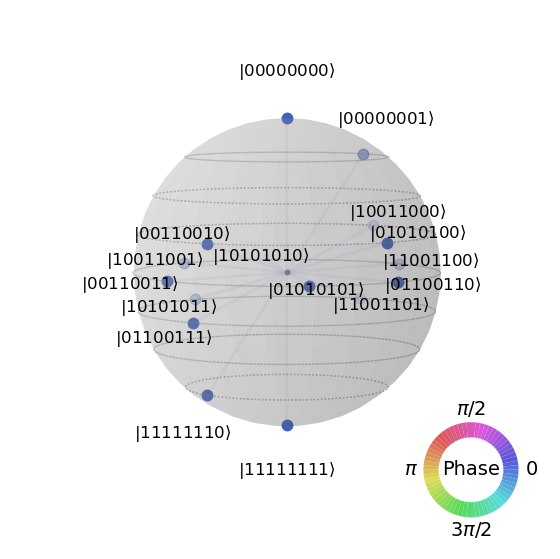

In [91]:
 plot_state_qsphere(outputstate)

In [92]:
# mesures des valeurs des 7Qubits grâce à la méthode "measure_all"

In [93]:
circ.measure_all()

In [94]:
# on affiche le circuit à ce stade

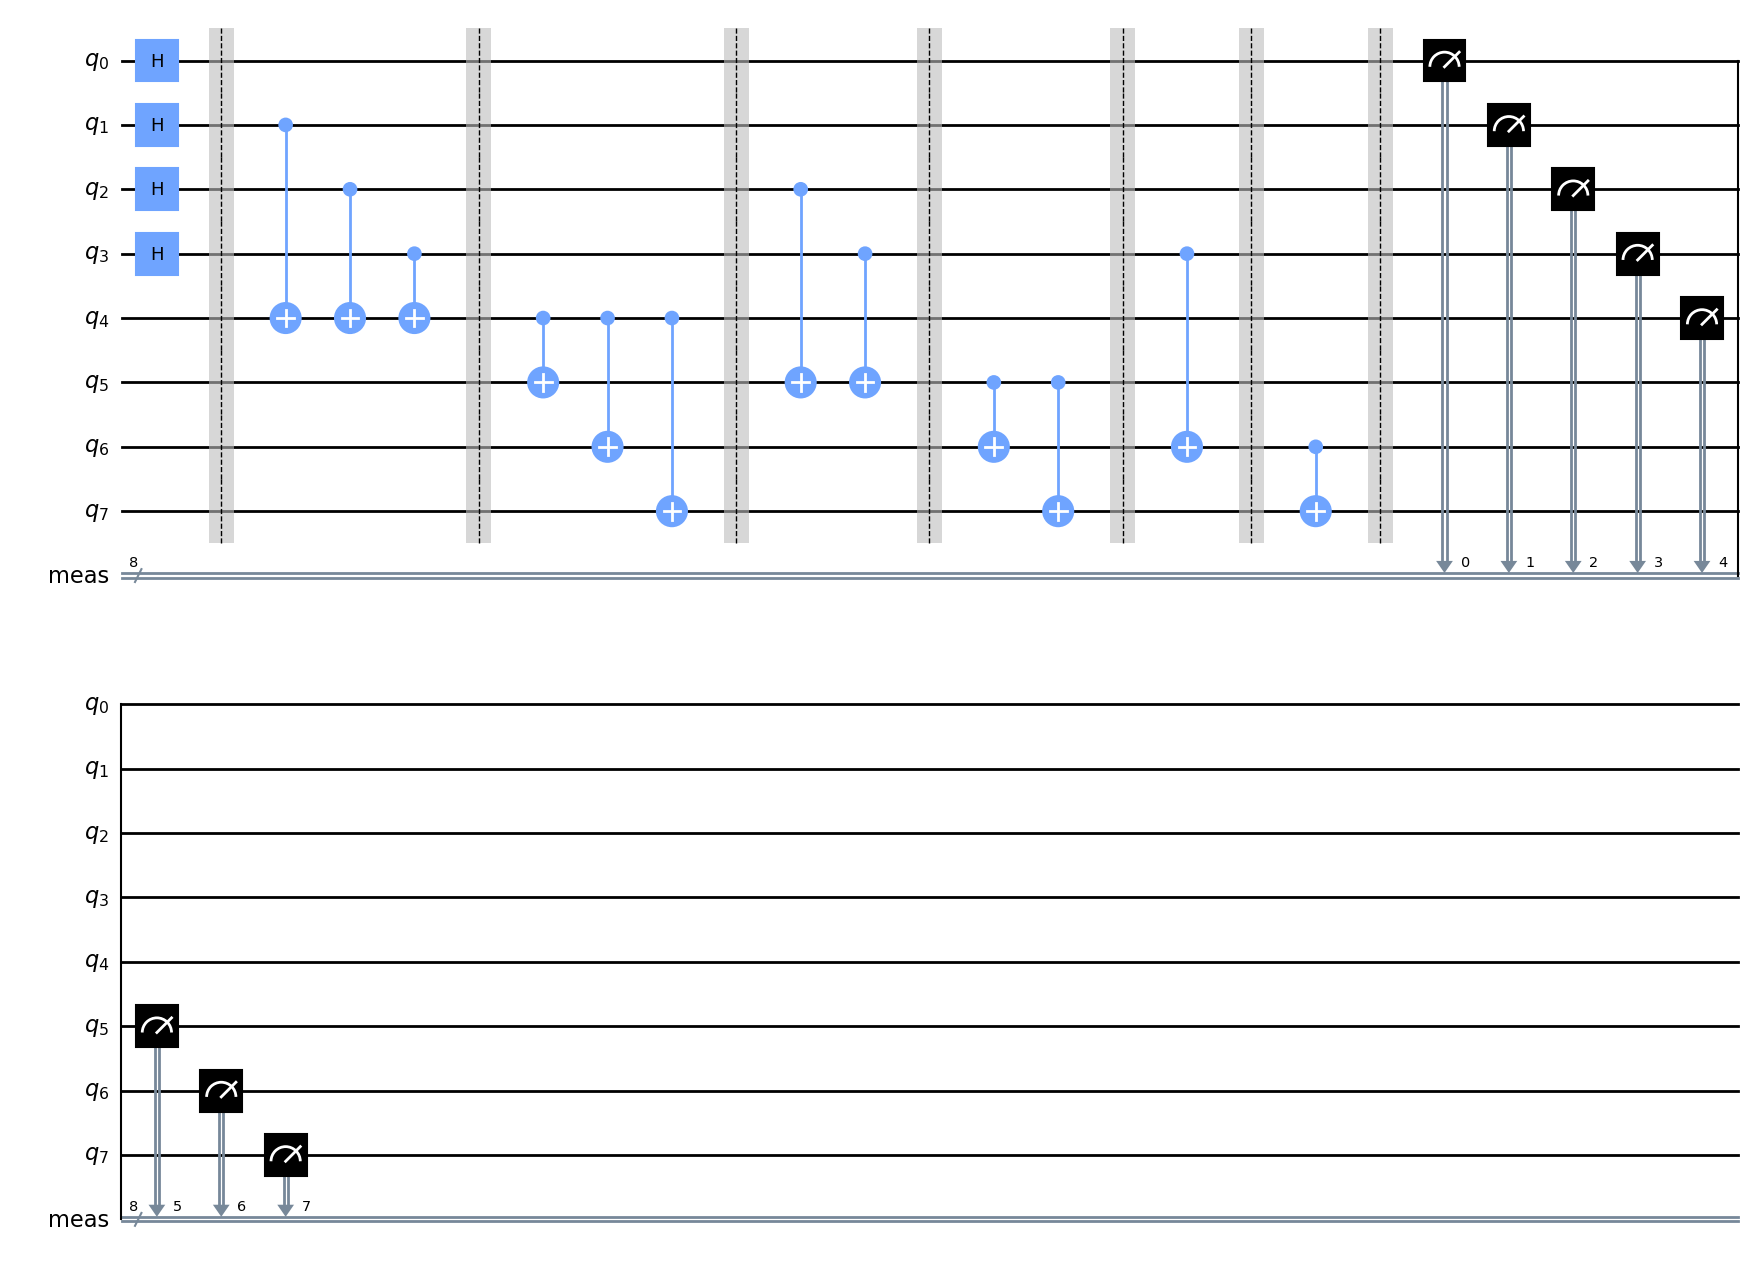

In [95]:
circ.draw("mpl")

In [96]:
# affichage du dictionnaire sous forme d'histogramme, avec les probabilités existantes pour chaque possibilité 
# du système

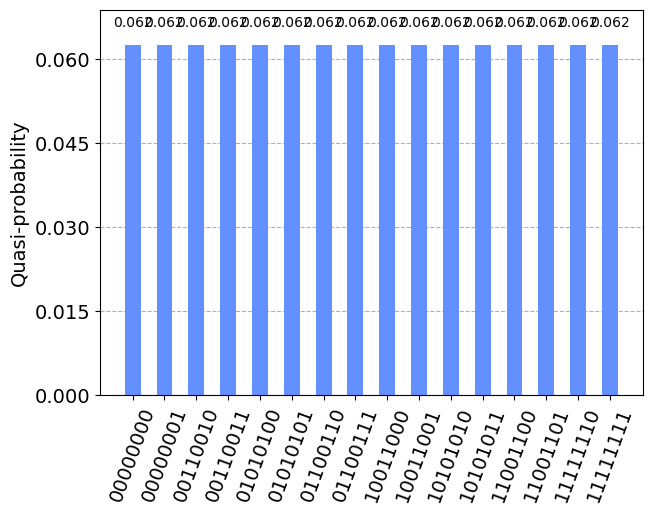

In [99]:
counts = result.get_counts()
plot_histogram(counts)

In [98]:
# Ainsi, on observe les seize possibilités offertes par le système (00000000, 10000000, 01001100, 11001100, 
# 00101010, 10101010, 01100110, 11100110, 00011001, 10011001, 01010101, 11010101, 00110011, 10110011, 01111111, 
# 11111111) et les probabilités d'obtenir l'une ou l'autre des possibilités (6,2% de chances pour chaque 
# probabilité)

In [102]:
# utilisation d'un simulator qasm

In [107]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circ, simulator, shots=20000).result()

In [109]:
# décompte des résultats obtenus pour chaque possibilité du système (nombre de fois ou chaque possibilité 
# est mesurée), en fonction du nombre d'itérations donné (ici 20000).

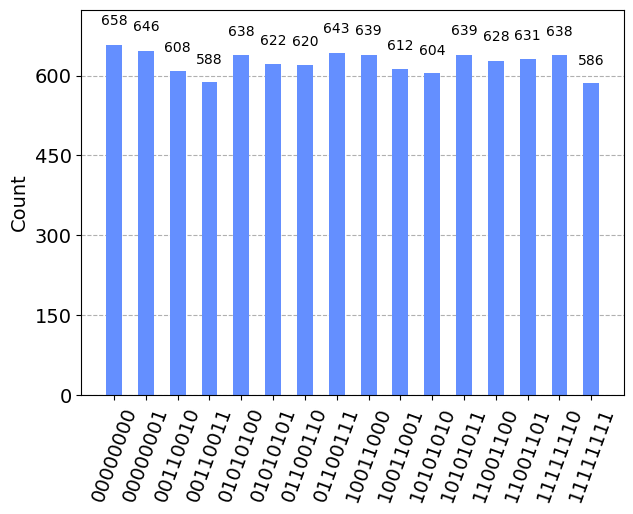

In [110]:
counts = result.get_counts(circ)
plot_histogram(counts)